In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the cleaned data
os.chdir("C:\\Users\\SHREYA\\Desktop\\Datasets")
df = pd.read_csv('data.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Marketing Channel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,Email
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,Direct
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,Organic Search
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,Organic Search
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,Affiliate


Phase 2 - EDA (Exploratory Data Analysis)

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Marketing Channel'],
      dtype='object')

In [7]:
df.shape

(541909, 9)

In [9]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Marketing Channel
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38,7
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom,Social Media
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478,77879
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   InvoiceNo          541909 non-null  object 
 1   StockCode          541909 non-null  object 
 2   Description        540455 non-null  object 
 3   Quantity           541909 non-null  int64  
 4   InvoiceDate        541909 non-null  object 
 5   UnitPrice          541909 non-null  float64
 6   CustomerID         406829 non-null  float64
 7   Country            541909 non-null  object 
 8   Marketing Channel  541909 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 37.2+ MB


In [12]:
# Create binary flag: 1 if returned, 0 otherwise
df['is_returned'] = df['Quantity'].apply(lambda x: 1 if x < 0 else 0)

# Convert Quantity to absolute value for calculations
df['Quantity'] = df['Quantity'].abs()

In [14]:
df[df.is_returned == 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Marketing Channel,is_returned
141,C536379,D,Discount,1,12-01-2010 09:41,27.50,14527.0,United Kingdom,Paid Ads,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,1,12-01-2010 09:49,4.65,15311.0,United Kingdom,Email,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,12,12-01-2010 10:24,1.65,17548.0,United Kingdom,Email,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,24,12-01-2010 10:24,0.29,17548.0,United Kingdom,Paid Ads,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,24,12-01-2010 10:24,0.29,17548.0,United Kingdom,Email,1
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,11,12-09-2011 09:57,0.83,14397.0,United Kingdom,Email,1
541541,C581499,M,Manual,1,12-09-2011 10:28,224.69,15498.0,United Kingdom,Referral,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,5,12-09-2011 11:57,10.95,15311.0,United Kingdom,Paid Ads,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,1,12-09-2011 11:58,1.25,17315.0,United Kingdom,Direct,1


In [15]:
# Return rate overall
return_rate = df['is_returned'].mean() * 100
print(f"Overall Return Rate: {return_rate:.2f}%")

Overall Return Rate: 1.96%


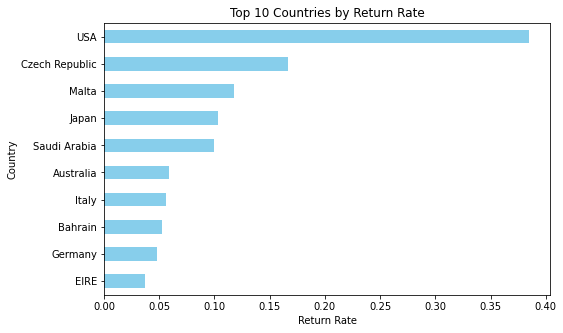

In [16]:
country_returns = df.groupby('Country')['is_returned'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
country_returns.plot(kind='barh', color='skyblue')
plt.xlabel('Return Rate')
plt.title('Top 10 Countries by Return Rate')
plt.gca().invert_yaxis()
plt.show()

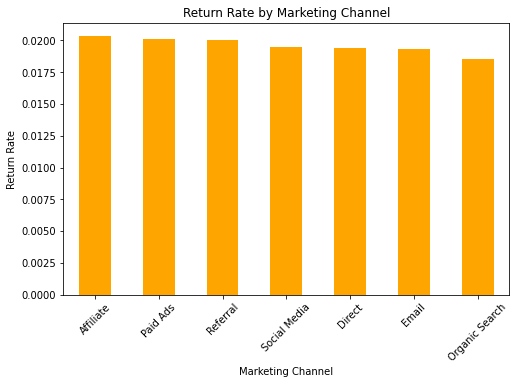

In [18]:
channel_returns = df.groupby('Marketing Channel')['is_returned'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
channel_returns.plot(kind='bar', color='orange')
plt.ylabel('Return Rate')
plt.title('Return Rate by Marketing Channel')
plt.xticks(rotation=45)
plt.show()

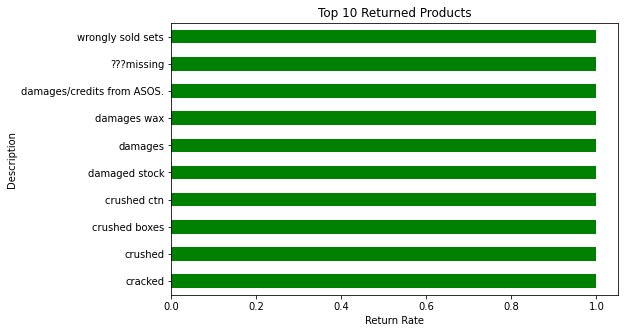

In [22]:
product_returns = df.groupby('Description')['is_returned'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
product_returns.plot(kind='barh', color='green')
plt.xlabel('Return Rate')
plt.title('Top 10 Returned Products')
plt.gca().invert_yaxis()
plt.show()

In [23]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract time features
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

# Total price column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Marketing Channel,is_returned,InvoiceMonth,InvoiceHour,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Email,0,12,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Direct,0,12,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Organic Search,0,12,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Organic Search,0,12,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Affiliate,0,12,8,20.34


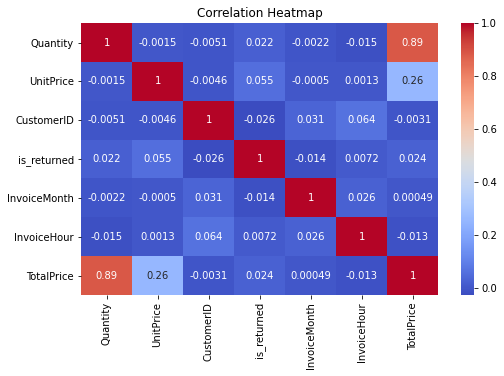

In [26]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Phase 3 – Logistic Regression for Return Prediction

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [28]:
# Copy dataset
model_df = df.copy()

# Encode categorical variables
label_cols = ['Country', 'Marketing Channel', 'Description']  # Include 'Description' if needed
for col in label_cols:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col])

# Define features and target
X = model_df[['Quantity', 'UnitPrice', 'TotalPrice', 'InvoiceMonth', 'InvoiceHour', 'Country', 'Marketing Channel']]
y = model_df['is_returned']

In [29]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Model Generation

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
# Model Evaluation

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    106226
           1       0.64      0.01      0.02      2156

    accuracy                           0.98    108382
   macro avg       0.81      0.50      0.50    108382
weighted avg       0.97      0.98      0.97    108382

Confusion Matrix:
 [[106216     10]
 [  2138     18]]
ROC-AUC Score: 0.58


In [33]:
df['return_risk_score'] = model.predict_proba(X)[:, 1]
df[['Description', 'Country', 'Marketing Channel', 'return_risk_score']].head()

,Description,Country,Marketing Channel,return_risk_score
0,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,Email,0.013256
1,WHITE METAL LANTERN,United Kingdom,Direct,0.013205
2,CREAM CUPID HEARTS COAT HANGER,United Kingdom,Organic Search,0.013227
3,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,Organic Search,0.013214
4,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,Affiliate,0.013200


In [36]:
# Export High-Risk Products
high_risk = df[df['return_risk_score'] > 0.7]  # threshold can be adjusted
high_risk.to_csv('high_risk_products.csv', index=False)